## Chapter 1

In [ ]:
## ***************  EXCERCISE CHAPTER 1 - 1  **************************  ##

In [28]:
import warnings
warnings.filterwarnings('ignore')
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [29]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [30]:
import nsfg

In [31]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [32]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [33]:
preg.columns[1]

'pregordr'

In [34]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

In [35]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

In [36]:
pregordr[0]

1

In [37]:
# See the start point is same but end point is not included.
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

In [38]:
pregordr = preg.pregordr

In [39]:
preg.outcome.value_counts().sort_index()

outcome
1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: count, dtype: int64

In [40]:
preg.birthwgt_lb.value_counts().sort_index()

birthwgt_lb
0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: count, dtype: int64

In [41]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

In [42]:
preg.birthord.value_counts(dropna = False)

birthord
NaN     4445
1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: count, dtype: int64

In [43]:
preg.birthord.isnull().sum()

4445

In [44]:
preg.prglngth.value_counts().sort_index()

prglngth
0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: count, dtype: int64

In [45]:
preg.totalwgt_lb.mean()

7.265628457623368

In [46]:
preg['totalwgt_kg'] = preg.totalwgt_lb * 0.4535
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125,3.996469
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750,3.571313
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250,4.138187
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000,3.174500
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875,2.806031


In [47]:
preg.totalwgt_kg.mean()

3.294962505532197

In [48]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [49]:
resp = nsfg.ReadFemResp()

In [50]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [51]:
resp.age_r.value_counts().sort_index()

age_r
15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: count, dtype: int64

In [52]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


In [53]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.117813
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494250
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899031
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.117813


In [54]:
resp.age_r[resp.caseid == 1]

1069    44
Name: age_r, dtype: int64

In [55]:
preg.prglngth[preg.caseid==2298]

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

In [56]:
preg.birthwgt_lb[(preg.caseid==5013) & (preg.pregordr ==1)]

5516    7.0
Name: birthwgt_lb, dtype: float64

In [57]:
## ***************  EXCERCISE CHAPTER 1 - 2  **************************  ##

In [58]:
import sys
import nsfg
import thinkstats2
import numpy as np

In [59]:

def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df


In [60]:
def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass



In [61]:
resp = nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [62]:
resp.pregnum.value_counts()

pregnum
0     2610
2     1432
1     1267
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: count, dtype: int64

# Chapter 2

In [63]:
## ******************   EXCERCISE FROM CHAPTER 2  ***************************  ##

Based on the results in chapter 2 , the difference of mean pragnency length between first babies and other babies is just 0.078 ( 13 hours ).
Also the Cohens d is 0.029 std deviations. The difference is quite small to conclude that the first borns arrives late.

The evening news will try to make it a big news and hence a bigger number will always be a better show, I would go with the 13 hours delay between first borns and others to show that first borns do arrive late, while talking to a scientist or doctor I would take the approach of Cohens d and share the significance of the results.

Responding to Cecil Adams,  would write something as below :

Based on the samples collected by the NSFG, the length of pragnancies were studies from 0 to 50 weeks.Zero weeks must be the unavailability of data and 50 weeks must be an error. We considered time period of 27 to 46 weeks for this studies as we are studying full term pragnancies. After taking all live births in to consideration and dividing the samples in to firts borns and others, the average length of pragnancy for first borns lasted for 38.6 weeks while the average time for others was 38.52 weeks. Now you can see the differece is pretty close in weeks which is around 0.08 weeks or 13 hours. This could be a significant time if you ask a mother or a tv news anchor but if we check the cohens d coefficient which is 0.029 in this case, makes the number very small or insignificant. 


In [72]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

import thinkplot

In [66]:
# 2-4 Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others

#  Load live births
livebirths = preg[preg.outcome == 1]
livebirths.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125,3.996469
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750,3.571313
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250,4.138187
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000,3.174500
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875,2.806031


In [69]:
firsts = livebirths[livebirths.birthord == 1]
others = livebirths[livebirths.birthord != 1]

first_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='first')
other_hist = thinkstats2.Hist(others.totalwgt_lb, label='other')

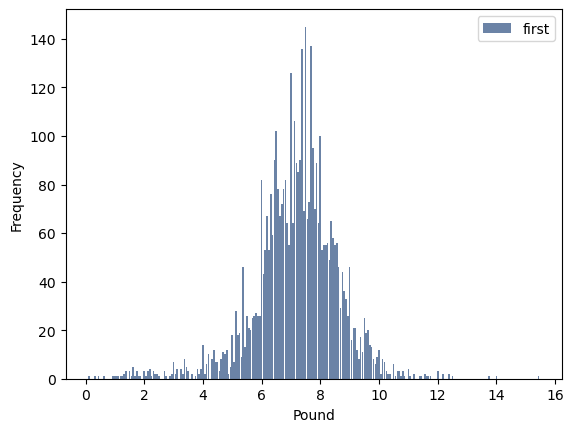

<Figure size 800x600 with 0 Axes>

In [88]:
thinkplot.Hist(first_hist)
thinkplot.Show(xlabel='Pound', ylabel='Frequency')

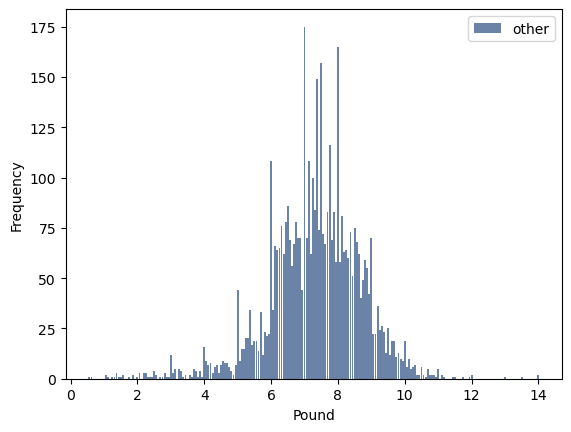

<Figure size 800x600 with 0 Axes>

In [89]:
thinkplot.Hist(other_hist)
thinkplot.Show(xlabel='Pound', ylabel='Frequency')

In [92]:
for totalwgt_lb, freq in first_hist.Smallest(10):
    print(totalwgt_lb, freq)

0.125 1
0.3125 1
0.4375 1
0.625 1
0.9375 1
1.0 1
1.0625 1
1.125 1
1.1875 1
1.25 1


In [93]:
for totalwgt_lb, freq in first_hist.Largest(10):
    print(totalwgt_lb, freq)

15.4375 1
14.0 1
13.75 1
12.5 1
12.375 2
12.1875 2
12.0 3
11.75 1
11.6875 1
11.625 1


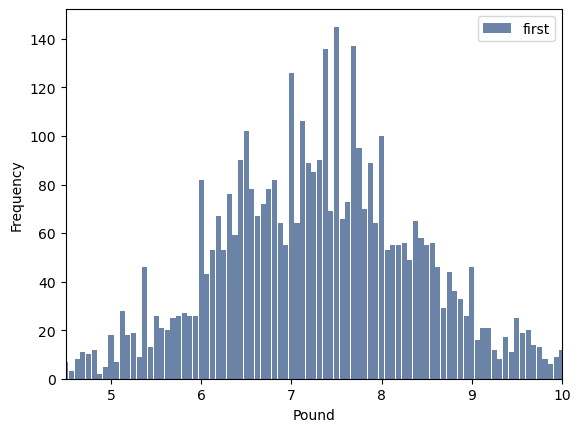

<Figure size 800x600 with 0 Axes>

In [95]:
thinkplot.Hist(first_hist)
thinkplot.Show(xlabel='Pound', ylabel='Frequency', xlim=[4.5, 10])

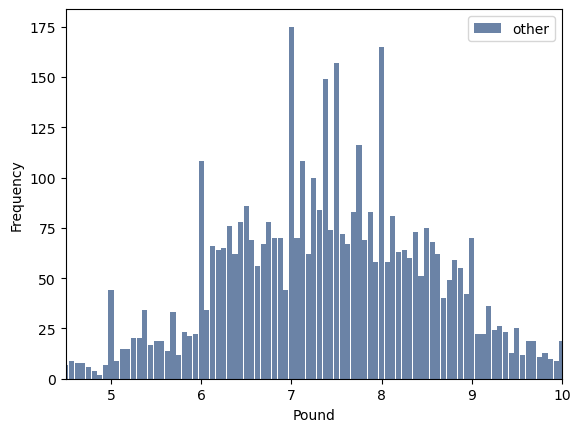

<Figure size 800x600 with 0 Axes>

In [96]:
thinkplot.Hist(other_hist)
thinkplot.Show(xlabel='Pound', ylabel='Frequency', xlim=[4.5, 10])

In [97]:
mean = livebirths.totalwgt_lb.mean()
var = livebirths.totalwgt_lb.var()
std = livebirths.totalwgt_lb.std()


In [99]:
mean, std, var

(7.265628457623368, 1.4082934455690168, 1.9832904288326532)

In [104]:
livebirths[livebirths.birthord == 1].totalwgt_lb.mean() , livebirths[livebirths.birthord != 1].totalwgt_lb.mean() 

(7.201094430437772, 7.325855614973262)

In [106]:
(livebirths[livebirths.birthord == 1].totalwgt_lb.mean() - livebirths[livebirths.birthord != 1].totalwgt_lb.mean()) * 16

-1.9961789525678455

In [107]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [112]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.02887904465444988

In [110]:
CohenEffectSize(livebirths[livebirths.birthord == 1].totalwgt_lb, livebirths[livebirths.birthord != 1].totalwgt_lb)

-0.088672927072602

Above results shows that the first born babies are lighter by around 2 ounces compared to other born kids. the difference between first born weight compared to others is very small or insignificant ( if you ask a mother). As the Cohens d is small ( <0.20) in both the cases, we can say the results are not very significant.